<a href="https://colab.research.google.com/github/Puttaraj276/Project-Management/blob/main/MultipleLRScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Modules

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Input Data

In [16]:
# Input the data set
df = pd.read_csv("HousingData.csv")


In [31]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [43]:
df['CRIM']=df['CRIM'].fillna(df['CRIM'].mean())
df['ZN']=df['ZN'].fillna(df['ZN'].mean())
df['INDUS']=df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS']=df['CHAS'].fillna(df['CHAS'].mean())
df['AGE']=df['AGE'].fillna(df['AGE'].mean())
df['LSTAT']=df['LSTAT'].fillna(df['LSTAT'].mean())

## Define features and labels

In [44]:
# Define features and labels
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [45]:
x.shape

(506, 13)

In [46]:
y.shape

(506,)

## Converting text into columns

In [37]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


## Scaling Dataset

In [47]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


## Separating training and testing data

In [48]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)


## Implementing the logic for cost function and gradient descent function

In [49]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [50]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs

    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y

        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)

        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient

        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost

        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)

    return w, b, cost_list

## Calculating weights and bias

In [51]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)
#38791988.606615104 is lowest cost achieved

Cost at epoch 0 is: 307.1804280842215
Cost at epoch 1500 is: 12.831530136578138
Cost at epoch 3000 is: 11.94474231690276
Cost at epoch 4500 is: 11.850132354811329
Cost at epoch 6000 is: 11.810468743747265
Cost at epoch 7500 is: 11.791271532425569
Cost at epoch 9000 is: 11.780910922252543
Cost at epoch 10500 is: 11.774814810959425
Cost at epoch 12000 is: 11.771006452170742
Cost at epoch 13500 is: 11.768536657652039


## Plotting the cost function

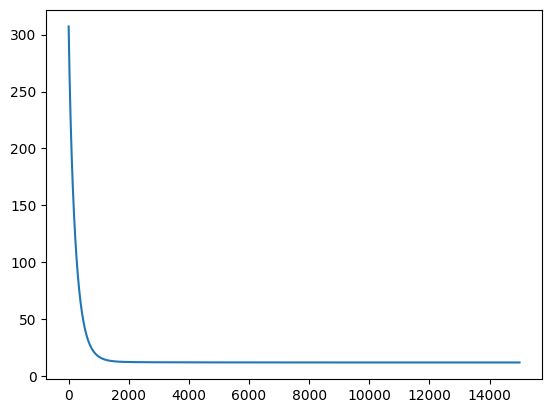

In [52]:
# Plotting the cost
plt.plot(c)

## Predicting values

In [53]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [54]:
y_pred = predict(Xtest, w, b)

## Calculating accuracy

In [55]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

In [56]:
r2score(y_pred, Ytest)

0.705369601636064